In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/OCEAN'

/content/drive/MyDrive/OCEAN


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("./병합2.csv", encoding='cp949')
del df['Unnamed: 0']
df

,구,동,인구 (명),동면적 (㎢),인구밀도 (명/㎢),녹지면적 (㎢),1인당녹지면적 (㎢),건축면적 (㎢),건물밀도,미세먼지수치,대기지수,평균온도
0,강남구,개포동,76975.0,6.51,11824.116743,0.140958,8.109435e-06,1.044446,0.160437,22.079722,3622.494313,13.166667
1,강남구,논현동,42894.0,2.72,15769.852941,0.040588,1.838213e-06,0.976052,0.358843,12.344547,3620.547278,13.250000
2,강남구,대치동,80435.0,3.52,22850.852273,0.069281,2.905367e-06,0.550119,0.156284,16.559791,3621.390327,13.250000
3,강남구,도곡동,54120.0,2.04,26529.411765,0.560740,2.635801e-05,0.468453,0.229634,13.995855,3620.877540,13.125000
4,강남구,삼성동,43801.0,3.18,13773.899371,NaN,NaN,0.676853,0.212847,12.344547,3620.547278,13.250000
...,...,...,...,...,...,...,...,...,...,...,...,...
228,중랑구,면목동,138059.0,6.01,22971.547421,8.566190,3.538870e-04,1.210447,0.201406,14.243497,3913.304301,13.500000
229,중랑구,묵동,52968.0,1.87,28325.133690,0.008973,2.612730e-07,0.418689,0.223898,15.673062,3913.590214,11.750000
230,중랑구,상봉동,44326.0,1.53,28971.241830,0.015726,6.631467e-07,0.380796,0.248886,15.673062,3913.590214,12.625000
231,중랑구,신내동,58360.0,3.49,16722.063037,1.120141,2.931922e-05,0.914841,0.262132,15.673062,3913.590214,11.750000


In [ ]:
df[df.isnull().any(axis=1)]

,구,동,인구 (명),동면적 (㎢),인구밀도 (명/㎢),녹지면적 (㎢),1인당녹지면적 (㎢),건축면적 (㎢),건물밀도,미세먼지수치,대기지수,평균온도
4,강남구,삼성동,43801.0,3.18,13773.899371,NaN,NaN,0.676853,0.212847,12.344547,3620.547278,13.25
7,강남구,신사동,15876.0,1.89,8400.000000,NaN,NaN,0.328134,0.173616,24.689093,3623.016188,13.75
45,관악구,삼성동,20642.0,2.66,7760.150376,NaN,NaN,0.176474,0.066344,14.245458,3759.290374,13.25
50,관악구,신사동,24719.0,0.64,38623.437500,NaN,NaN,0.176474,0.275741,14.245458,3759.290374,12.75
195,은평구,신사동,46481.0,1.84,25261.413043,NaN,NaN,0.301633,0.163931,13.844483,3703.078280,11.25


### NaN -> 인접한 지역의 평균으로 대체
강남구 삼성동: 논현동, 대치동, 역삼동, 청담동  
강남구 신사동: 논현동, 압구정동  
관악구 삼성동: 난곡동, 난향동, 대학동, 서림동, 신원동  
관악구 신사동: 조원동, 신림동, 미성동, 신원동  
은평구 신사동: 역촌동, 응암동, 증산동, 수색동

In [ ]:
a = ['논현동', '대치동', '역삼동', '청담동']
b = ['논현동', '압구정동']
c = ['난곡동', '난향동', '대학동', '서림동', '신원동']
d = ['조원동', '신림동', '미성동', '신원동']
e = ['역촌동', '응암동', '증산동', '수색동']

In [ ]:
df.iloc[4,5] = df[df['동'].isin(a)].mean()['녹지면적 (㎢)']
df.iloc[4,6] = df[df['동'].isin(a)].mean()['1인당녹지면적 (㎢)']

df.iloc[7,5] = df[df['동'].isin(b)].mean()['녹지면적 (㎢)']
df.iloc[7,6] = df[df['동'].isin(b)].mean()['1인당녹지면적 (㎢)']

df.iloc[45,5] = df[df['동'].isin(c)].mean()['녹지면적 (㎢)']
df.iloc[45,6] = df[df['동'].isin(c)].mean()['1인당녹지면적 (㎢)']

df.iloc[50,5] = df[df['동'].isin(d)].mean()['녹지면적 (㎢)']
df.iloc[50,6] = df[df['동'].isin(d)].mean()['1인당녹지면적 (㎢)']

df.iloc[195,5] = df[df['동'].isin(e)].mean()['녹지면적 (㎢)']
df.iloc[195,6] = df[df['동'].isin(e)].mean()['1인당녹지면적 (㎢)']

df[df.isnull().any(axis=1)]

,구,동,인구 (명),동면적 (㎢),인구밀도 (명/㎢),녹지면적 (㎢),1인당녹지면적 (㎢),건축면적 (㎢),건물밀도,미세먼지수치,대기지수,평균온도


In [ ]:
df['지역'] = df['구'] + ' ' + df['동']
df.set_index('지역', inplace=True)

del df['구']
del df['동']

df

,인구 (명),동면적 (㎢),인구밀도 (명/㎢),녹지면적 (㎢),1인당녹지면적 (㎢),건축면적 (㎢),건물밀도,미세먼지수치,대기지수,평균온도
지역,,,,,,,,,,
강남구 개포동,76975.0,6.51,11824.116743,0.140958,8.109435e-06,1.044446,0.160437,22.079722,3622.494313,13.166667
강남구 논현동,42894.0,2.72,15769.852941,0.040588,1.838213e-06,0.976052,0.358843,12.344547,3620.547278,13.250000
강남구 대치동,80435.0,3.52,22850.852273,0.069281,2.905367e-06,0.550119,0.156284,16.559791,3621.390327,13.250000
강남구 도곡동,54120.0,2.04,26529.411765,0.560740,2.635801e-05,0.468453,0.229634,13.995855,3620.877540,13.125000
강남구 삼성동,43801.0,3.18,13773.899371,0.075572,2.847457e-06,0.676853,0.212847,12.344547,3620.547278,13.250000
...,...,...,...,...,...,...,...,...,...,...
중랑구 면목동,138059.0,6.01,22971.547421,8.566190,3.538870e-04,1.210447,0.201406,14.243497,3913.304301,13.500000
중랑구 묵동,52968.0,1.87,28325.133690,0.008973,2.612730e-07,0.418689,0.223898,15.673062,3913.590214,11.750000
중랑구 상봉동,44326.0,1.53,28971.241830,0.015726,6.631467e-07,0.380796,0.248886,15.673062,3913.590214,12.625000


In [ ]:
del df['인구 (명)']
del df['동면적 (㎢)']
del df['녹지면적 (㎢)']
del df['건축면적 (㎢)']
del df['미세먼지수치']

df

,인구밀도 (명/㎢),1인당녹지면적 (㎢),건물밀도,대기지수,평균온도
지역,,,,,
강남구 개포동,11824.116743,8.109435e-06,0.160437,3622.494313,13.166667
강남구 논현동,15769.852941,1.838213e-06,0.358843,3620.547278,13.250000
강남구 대치동,22850.852273,2.905367e-06,0.156284,3621.390327,13.250000
강남구 도곡동,26529.411765,2.635801e-05,0.229634,3620.877540,13.125000
강남구 삼성동,13773.899371,2.847457e-06,0.212847,3620.547278,13.250000
...,...,...,...,...,...
중랑구 면목동,22971.547421,3.538870e-04,0.201406,3913.304301,13.500000
중랑구 묵동,28325.133690,2.612730e-07,0.223898,3913.590214,11.750000
중랑구 상봉동,28971.241830,6.631467e-07,0.248886,3913.590214,12.625000


In [ ]:
mm_scaler = MinMaxScaler()
norm_df = pd.DataFrame(mm_scaler.fit_transform(df), index=df.index, columns=df.columns)
norm_df

,인구밀도 (명/㎢),1인당녹지면적 (㎢),건물밀도,대기지수,평균온도
지역,,,,,
강남구 개포동,0.214793,0.000859,0.207352,0.263904,0.766667
강남구 논현동,0.295914,0.000195,0.499831,0.259058,0.800000
강남구 대치동,0.441493,0.000308,0.201229,0.261156,0.800000
강남구 도곡동,0.517121,0.002791,0.309358,0.259880,0.750000
강남구 삼성동,0.254879,0.000301,0.284612,0.259058,0.800000
...,...,...,...,...,...
중랑구 면목동,0.443975,0.037470,0.267746,0.987685,0.900000
중랑구 묵동,0.554040,0.000028,0.300902,0.988397,0.200000
중랑구 상봉동,0.567323,0.000070,0.337739,0.988397,0.550000


### 최적의 군집 개수 찾기
- 엘보우 메소드  
- 실루엣계수

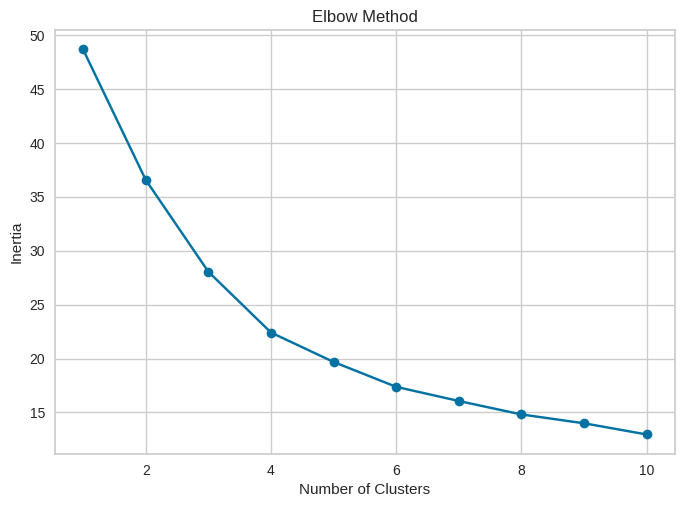

In [ ]:
inertia = []
for i in range(1,11):
    Km = KMeans(n_clusters=i, n_init=15, random_state=42)
    Km.fit(norm_df)
    inertia.append(Km.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

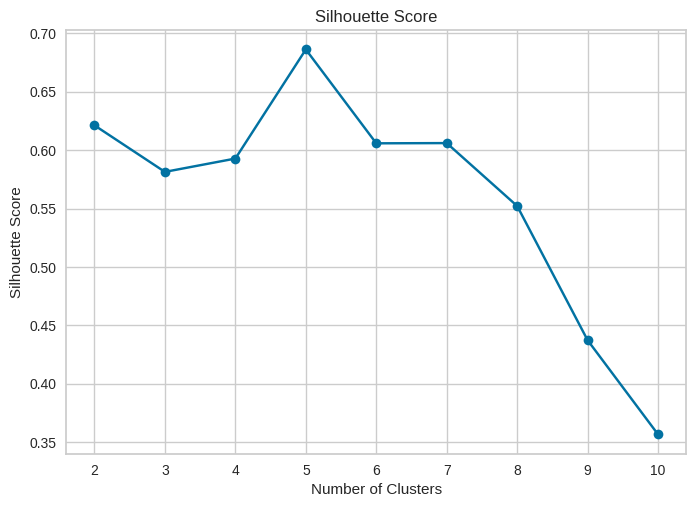

In [ ]:
silhouette_scores = []
for n_clusters in range(2,11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(norm_df)
    silhouette_avg = silhouette_score(norm_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2,11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

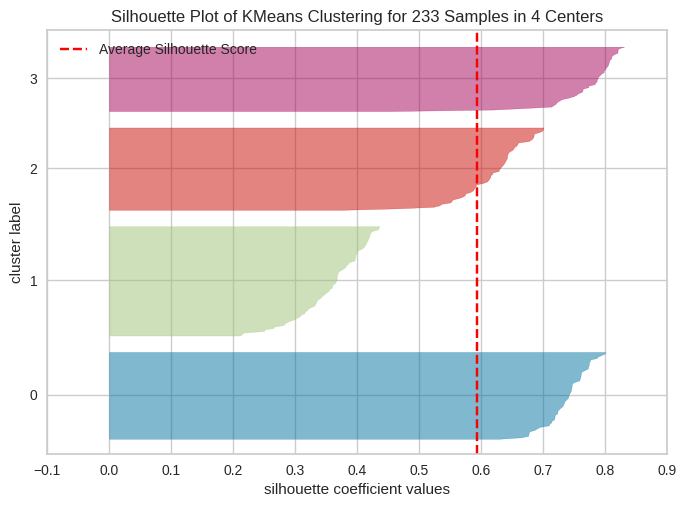

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 233 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
visualizer= SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(norm_df)
visualizer.show()

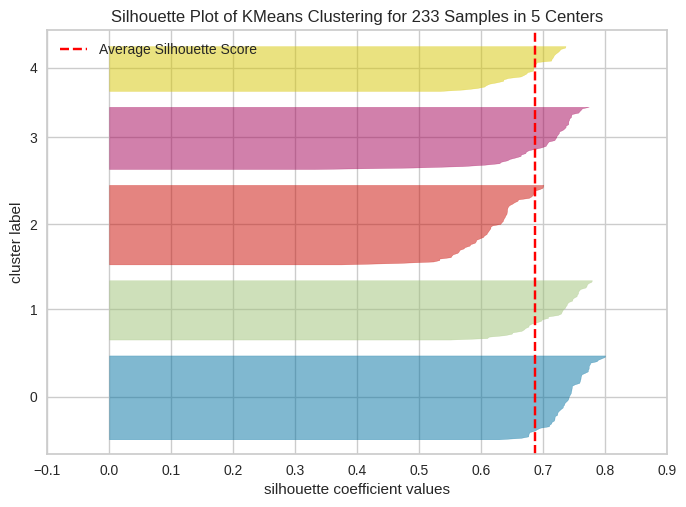

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 233 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
visualizer= SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(norm_df)
visualizer.show()

### 군집 개수 -> 4개

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=15, random_state=42)
norm_df['Cluster'] = kmeans.fit_predict(norm_df)
norm_df

,인구밀도 (명/㎢),1인당녹지면적 (㎢),건물밀도,대기지수,평균온도,Cluster
지역,,,,,,
강남구 개포동,0.214793,0.000859,0.207352,0.263904,0.766667,3
강남구 논현동,0.295914,0.000195,0.499831,0.259058,0.800000,3
강남구 대치동,0.441493,0.000308,0.201229,0.261156,0.800000,3
강남구 도곡동,0.517121,0.002791,0.309358,0.259880,0.750000,3
강남구 삼성동,0.254879,0.000301,0.284612,0.259058,0.800000,3
...,...,...,...,...,...,...
중랑구 면목동,0.443975,0.037470,0.267746,0.987685,0.900000,4
중랑구 묵동,0.554040,0.000028,0.300902,0.988397,0.200000,1
중랑구 상봉동,0.567323,0.000070,0.337739,0.988397,0.550000,1


In [ ]:
norm_df['Cluster'].value_counts()

4    59
3    56
0    44
1    42
2    32
Name: Cluster, dtype: int64

In [ ]:
cluster_means = norm_df.groupby('Cluster').mean()
cluster_means

,인구밀도 (명/㎢),1인당녹지면적 (㎢),건물밀도,대기지수,평균온도
Cluster,,,,,
0,0.149082,0.028199,0.141411,0.732827,0.597045
1,0.659220,0.000460,0.389426,0.716981,0.585969
2,0.334639,0.002091,0.184798,0.422674,0.167969
3,0.392955,0.001386,0.289830,0.282977,0.833631
4,0.448525,0.002202,0.264068,0.775273,0.840678
